# <font color="blue"> Walmart sales prediction </font>
In this project we're going to predict the weekly sales from different Walmart stores using a linear regression

## <font color="cyan"> First phase: pre-settings</font>

In [ ]:
#Libraries for our project
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## <font color="cyan"> Second phase: analyzing our data </font>

In [ ]:
#Importing the data
walmart_dataset = pd.read_csv('drive/MyDrive/Computer science/Personal/Datasets/Walmart_sales.csv')
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### <font color="lime">

In [ ]:
#Let's take look on the dataframe information
print('Columns:')
print(walmart_dataset.columns)
print('\nDatashape dimenssions:')
print(walmart_dataset.shape)
print('\nColumn Dtypes:')
print(walmart_dataset.dtypes)
print('\nNumber of null values by column:')
print(walmart_dataset.isnull().sum())
print('\nDataframe information:')
print(walmart_dataset.info())
print('\nDataframe description:')
print(walmart_dataset.describe())

Columns:
Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Datashape dimenssions:
(6435, 8)

Column Dtypes:
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Number of null values by column:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature  

In this dataset we have a total of 8 columns, the target colum it'll be <font color="salmon"> Weekly_Sales </font>.

We got int64 and float64 columns, but only one object column: the Date, I'm going to convert this column into the date type and maybe I'll split the column by years, months and week number.

Fortunately this is a clean dataset: we don't have any corrupted data or null values.

Columns description:


*   Store: the number of the store (from 1 to 45)
*   Weekly_Sales (target): total sum of the weekly sales (USD)
*   Holiday_Flag: indicates if the day it's holiday or not
*   Temperature: temperature of the region
*   Fuel_Price: fuel price (USD)
*   CPI: consumer price index
*   Unemployment: Unemployment rate





Before starting the visualizations, let's create the date columns from the original "Date" column

In [ ]:
walmart_dataset['Date'] = walmart_dataset['Date'].apply(lambda x: datetime.strptime(x,'%d-%m-%Y'))
walmart_dataset['Year'] = walmart_dataset['Date'].dt.year
walmart_dataset['Month'] = walmart_dataset['Date'].dt.month
walmart_dataset['Week_Number'] = walmart_dataset['Date'].dt.isocalendar().week
walmart_dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week_Number
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,39
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,40
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,41
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,42


### <font color="lime"> Visualization </font>

First we have the correlation heatmap

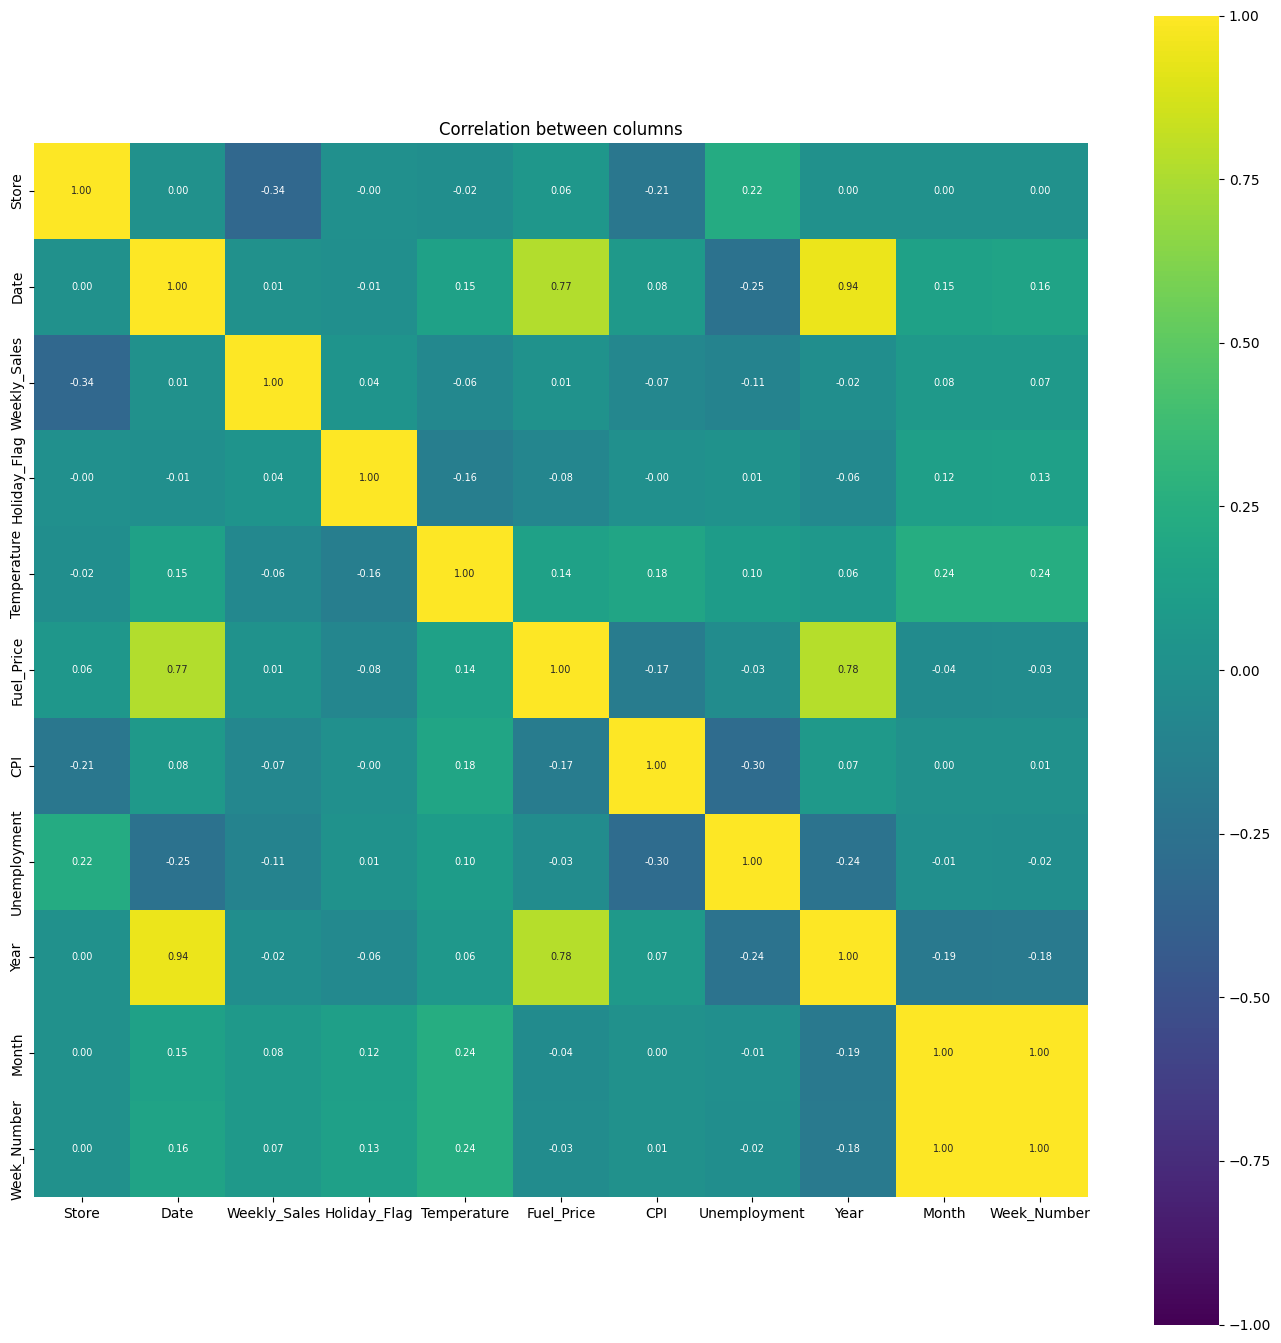

In [ ]:
corr = walmart_dataset.corr()
fig=plt.figure(figsize=(17 ,17))
ax=sns.heatmap(corr,vmax=1,vmin=-1,square=True,cmap='viridis',annot=True,fmt=".2f",annot_kws={"size": 7})
plt.title('Correlation between columns')
plt.show()

The Store column is the one with the best correlation, behind that we got the Unemployment rate, the week number, the month,and CPI.

Date and Fuel_Price have almost zero correlation with the sales, also both columns have strong correlation with each other (year also has a strong correlation with the fuel price) so it's better to get rid of these columns.

Month and week number also have a strong correlation, I'm keeping the Month column because it has a little more correlation.

Then we got the displots

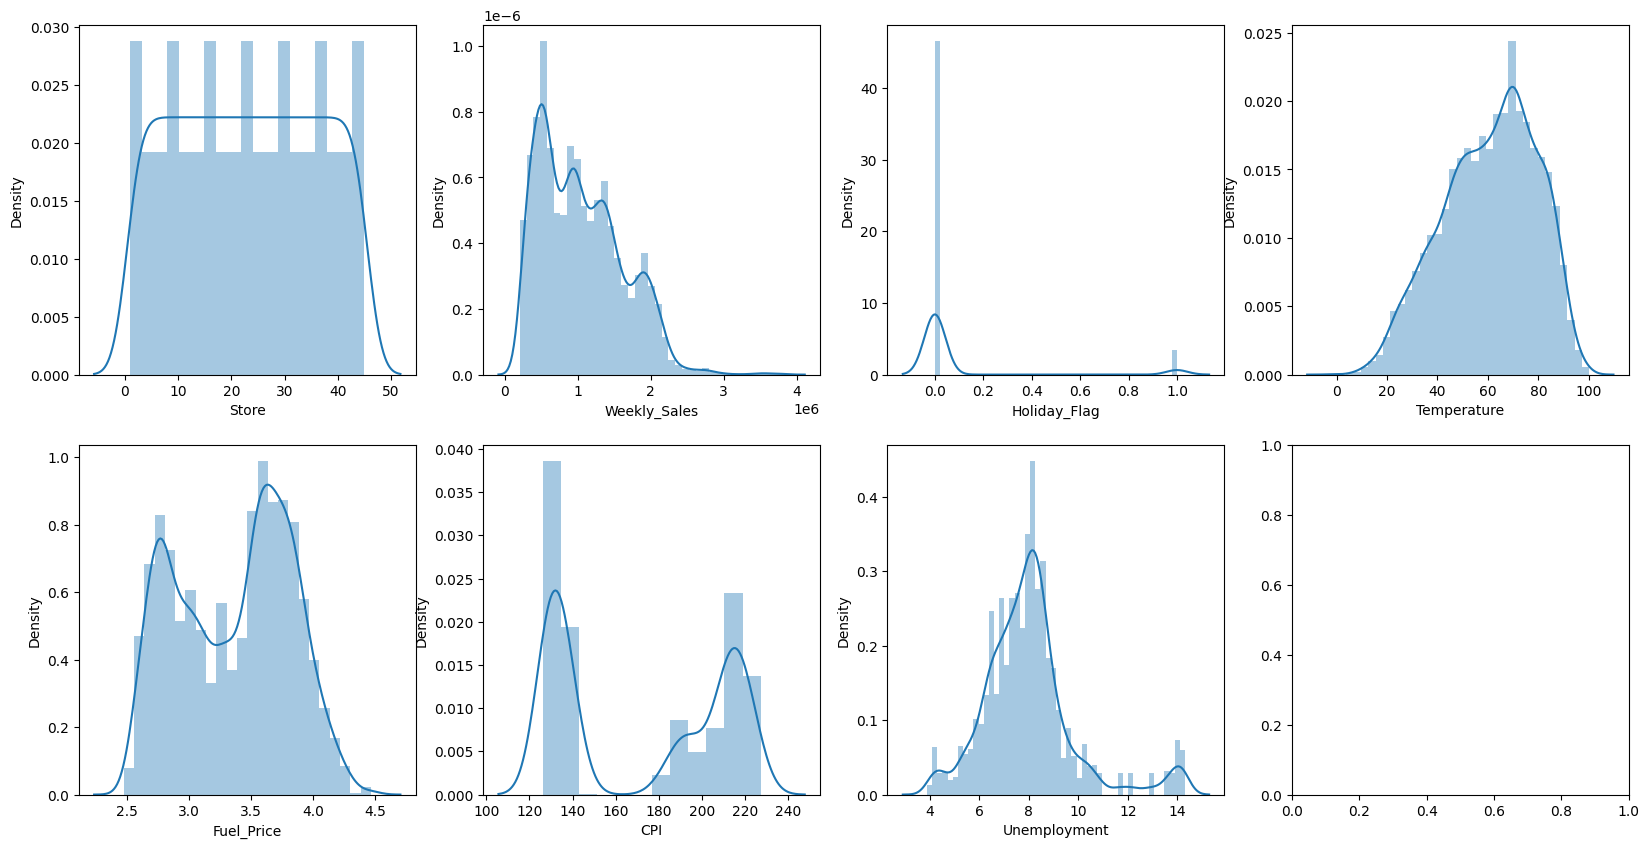

In [ ]:
columns=walmart_dataset.select_dtypes(include=['float64','int64']).columns
f,axes=plt.subplots(2,4,figsize=(20,10))
i=0
j=0
for col in columns:
  sns.distplot(walmart_dataset[col],ax=axes[i,j])
  if j==3:
    j=0
    i+=1
  else:
    j+=1

Temperature has almost a gaussian distribution, unemployment also has a gaussian distribution with some outliers, CPI seems to have a double gaussian distribution.

Now let's see our boxplots

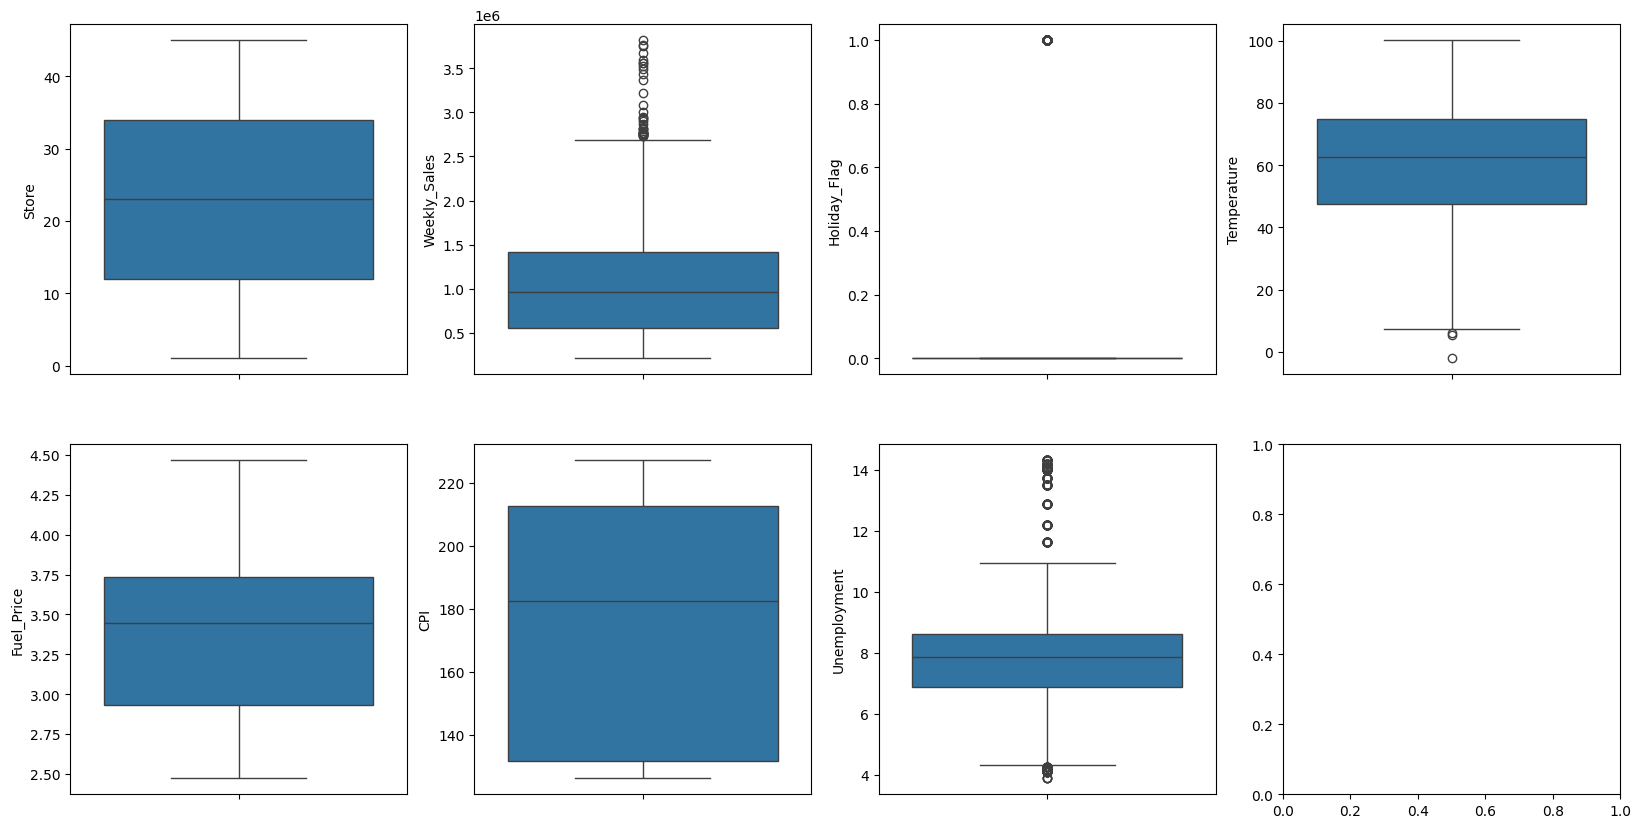

In [ ]:
f,axes=plt.subplots(2,4,figsize=(20,10))
i=0
j=0
for col in columns:
  sns.boxplot(walmart_dataset[col],ax=axes[i,j])
  if j==3:
    j=0
    i+=1
  else:
    j+=1

Unemployment and temperatures have outliers, better get rid of them in the preprocesing (Weekly sales has also a lot of outliers).

And finally let's see the pairplot of our data

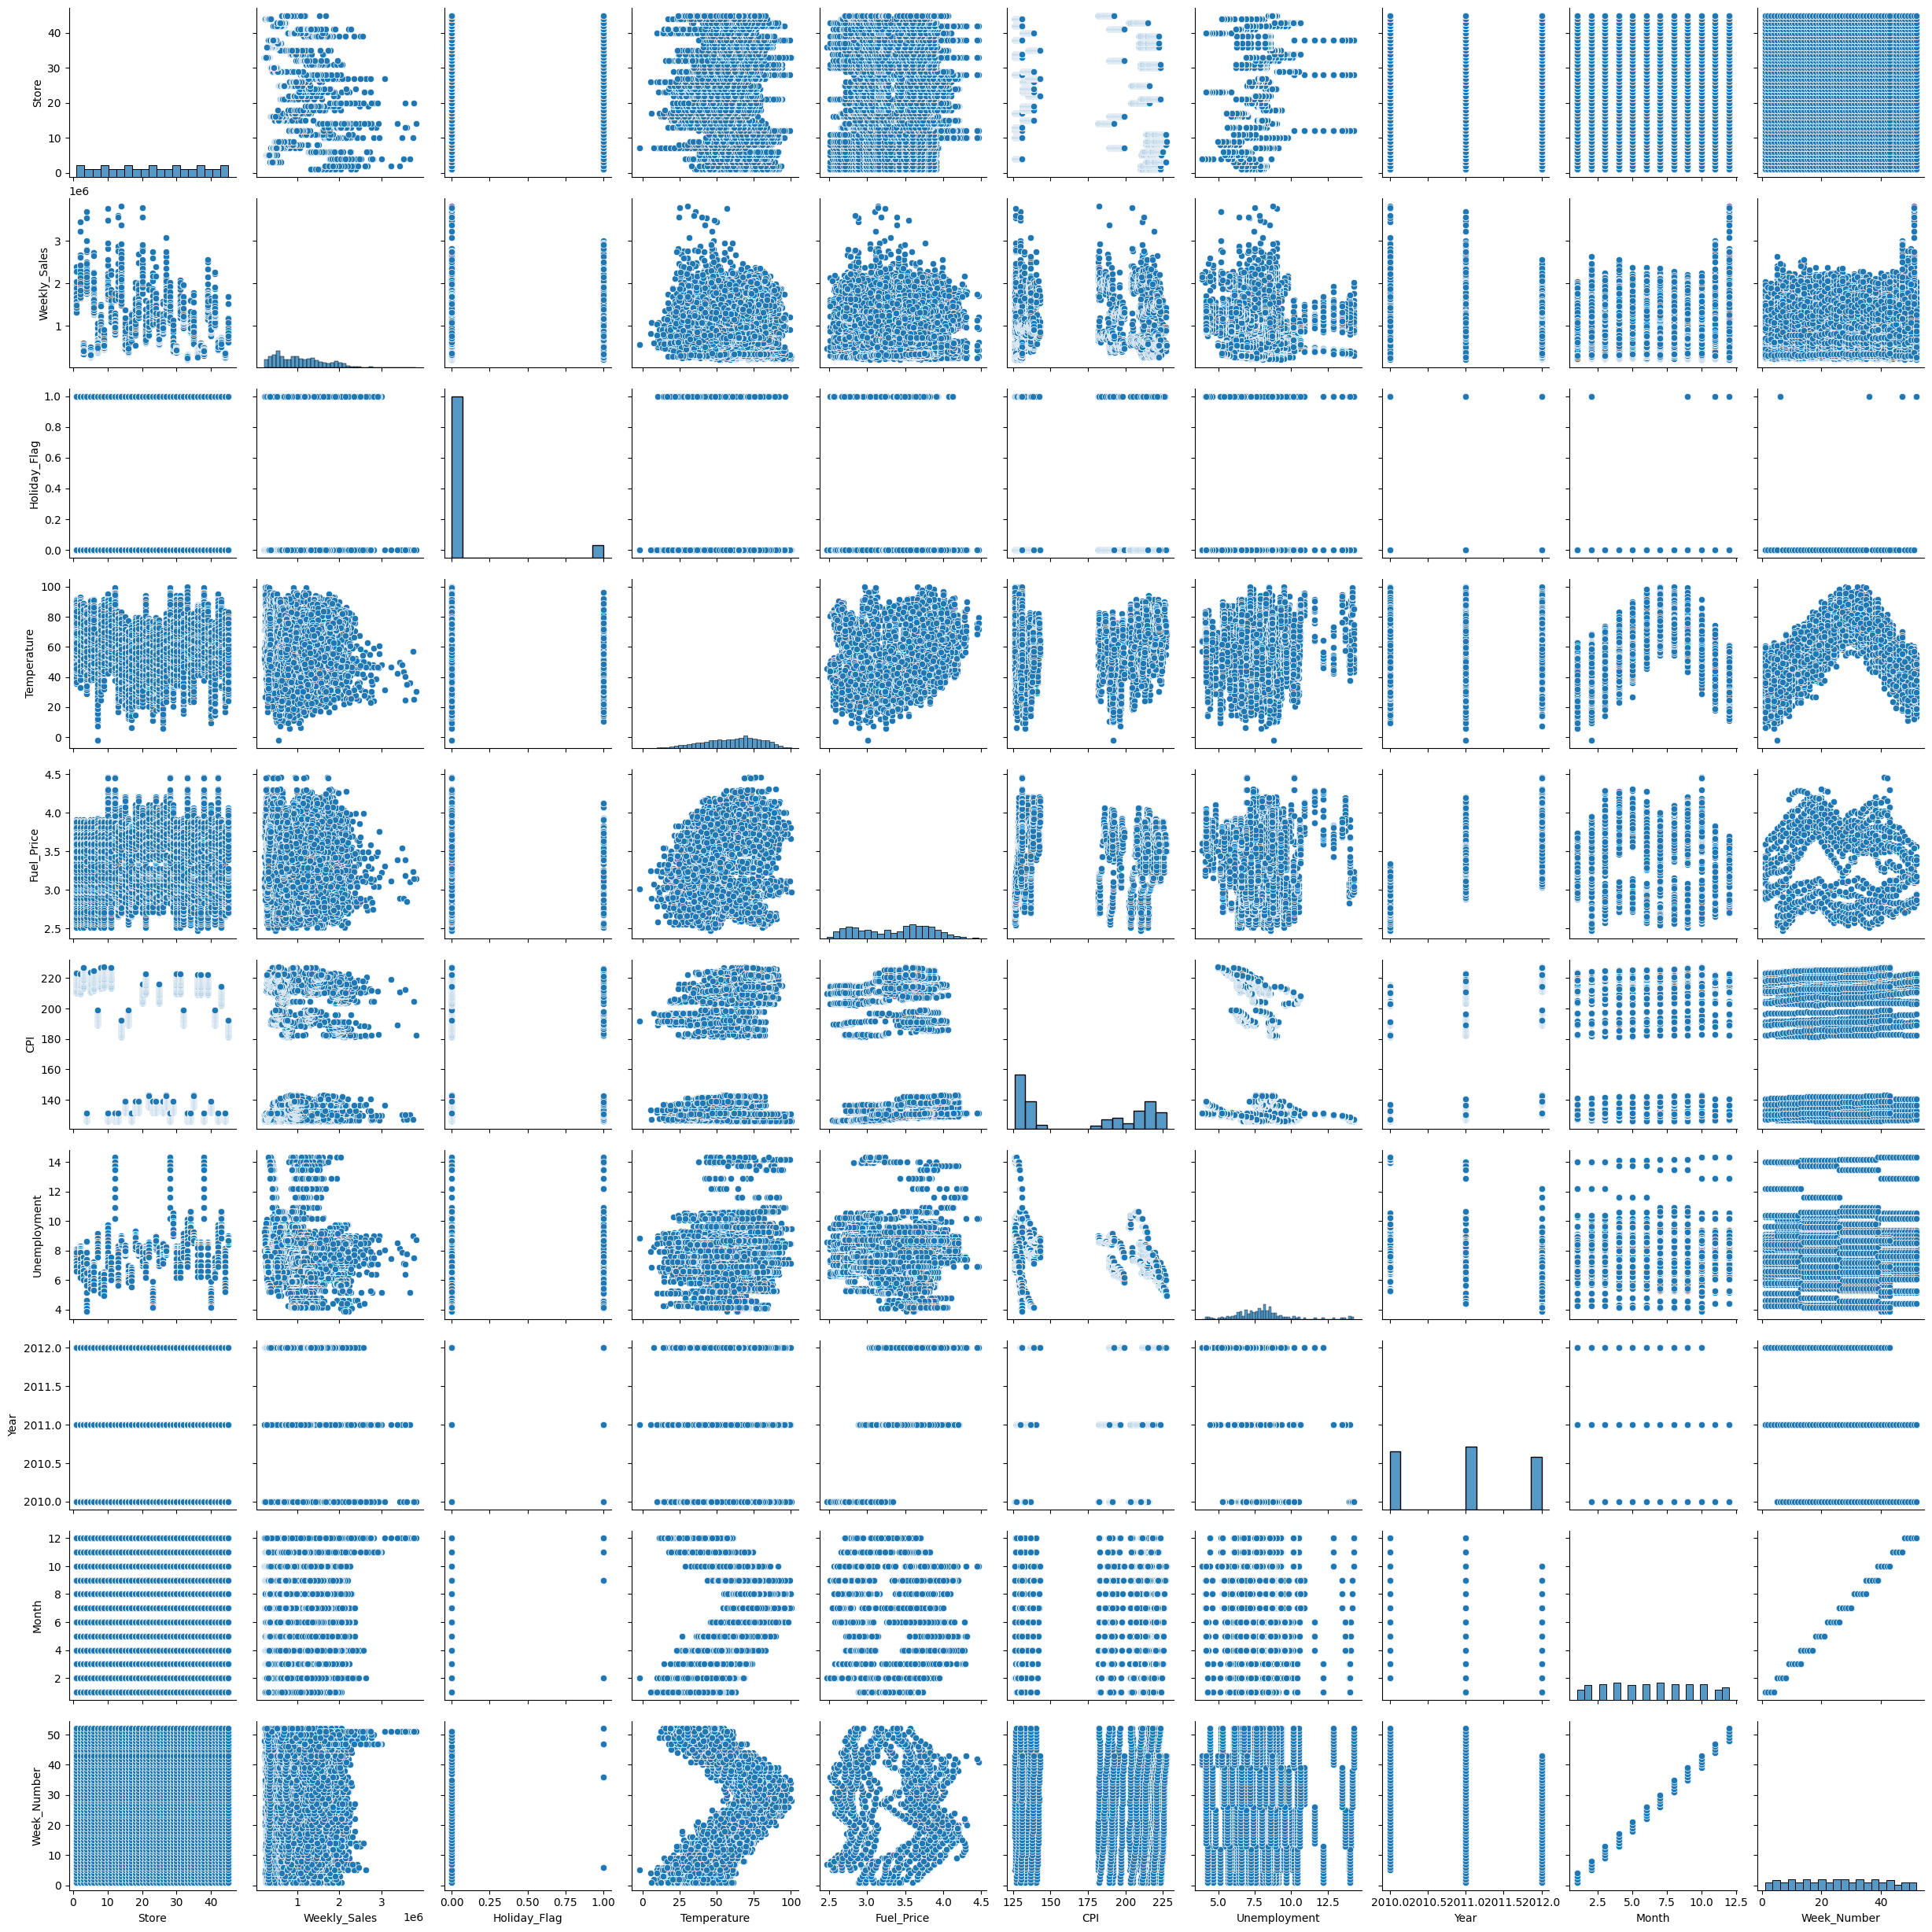

In [ ]:
sns.pairplot(walmart_dataset)

It seems the column weekly sales dosen't have any linear trend

### **Our conclusions:**


*   The best columns are Store (has the strongest correlation with weekly sales), unemployment, temperature, CPI (these columns have a gaussian distribution), month and holiday flag.
*   We're removing the follow columns: date, fuel price, year (these three columns have almost no correlation with the weekly sales and they also have a strong correlation with each other) and week number (week number and month had a strong correlation with each other, so I'm droping one of them)
*   The data is clean, we don't have to apply any imputation methods or delete some column due the lack of information.
*   The columns temperature, CPI and unemployment need to be scaled up
*   Weekly sales, unemployment and temperature have **outliers**



## <font color="cyan"> Third phase: preprocesing </font>


In [ ]:
#Models
from sklearn.linear_model import Lasso,ElasticNet,Ridge,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import  RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, KFold

### <font color="lime"> A quick test before preprocesing </font>

In [ ]:
X = walmart_dataset[['Store','Unemployment','Temperature','CPI','Holiday_Flag','Month']]
y = walmart_dataset[['Weekly_Sales']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

models = [('Lasso',Lasso()),('Elastic Net',ElasticNet()),('Ridge',Ridge()),
          ('Linear Regression',LinearRegression()),('K Neighbors',KNeighborsRegressor()),
          ('SVR',SVR()),('Random Forest Regressor',RandomForestRegressor())]

for name,model in models:
    m = model
    m.fit(X_train,y_train)
    predicted_data = m.predict(X_test)

    mse = mean_squared_error(y_test, predicted_data)
    mae = mean_absolute_error(y_test, predicted_data)
    rmse = np.sqrt(mse)

    print('Model ',name)
    print(f'Mean squared error: {mse:,.3f}')
    print(f'Mean absolute error: {mae:,.3f}')
    print(f'Root mean squared error: {rmse:,.3f}')
    print()




Model  Lasso
Mean squared error: 281,350,608,454.637
Mean absolute error: 433,785.921
Root mean squared error: 530,424.932

Model  Elastic Net
Mean squared error: 281,583,663,738.440
Mean absolute error: 434,103.992
Root mean squared error: 530,644.574

Model  Ridge
Mean squared error: 281,350,934,343.598
Mean absolute error: 433,786.333
Root mean squared error: 530,425.239

Model  Linear Regression
Mean squared error: 281,350,415,404.402
Mean absolute error: 433,785.689
Root mean squared error: 530,424.750

Model  K Neighbors
Mean squared error: 122,030,043,045.832
Mean absolute error: 225,149.751
Root mean squared error: 349,327.988

Model  SVR
Mean squared error: 343,063,675,299.154
Mean absolute error: 472,098.699
Root mean squared error: 585,716.378

Model  Random Forest Regressor
Mean squared error: 20,478,417,235.882
Mean absolute error: 72,618.835
Root mean squared error: 143,102.821



### <font color="lime"> Preprocesing </font>

These are the steps to preprocess our data:
1. First we're going to select the best columns to get better results
2. Then all the outliers from the data it'll be removed
3. Some columns wi'll be standarized to get better results later
4. Finally we're applying a power transformation


In [ ]:
df_walmart = walmart_dataset.copy()
#Selecting the columns
df_walmart = df_walmart[['Weekly_Sales','Store','Unemployment','Temperature','CPI','Holiday_Flag','Month']]

#Removing outliers using the IQR method
def remove_outliers(df,column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr

  df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
  return df

original_rows = df_walmart.shape[0]
df_walmart = remove_outliers(df_walmart,'Weekly_Sales')
df_walmart = remove_outliers(df_walmart,'Unemployment')
df_walmart = remove_outliers(df_walmart,'Temperature')
new_rows= df_walmart.shape[0]
print(f'Removed {original_rows - new_rows} outlier rows')

#We're splitting our data again without the outliers
X = walmart_dataset[['Store','Unemployment','Temperature','CPI','Holiday_Flag','Month']]
y = walmart_dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#Standar scaling
scaler = StandardScaler()
columns_to_standarize = ['CPI','Temperature','Unemployment']
X_train[columns_to_standarize] = scaler.fit_transform(X_train[columns_to_standarize])
X_test[columns_to_standarize] = scaler.fit_transform(X_test[columns_to_standarize])

#Power transform
#pt = PowerTransformer(method='yeo-johnson')
#transformed_data = pt.fit_transform(X_train)
#X_train = pd.DataFrame(transformed_data, columns=X_train.columns)

#transformed_data = pt.fit_transform(X_test)
#X_test = pd.DataFrame(transformed_data, columns=X_test.columns)

Removed 516 outlier rows


### <font color="lime"> Another test after the preprocesing </font>

In [ ]:
for name,model in models:
    print('\n\nModel:',name)
    m = model
    m.fit(X_train,y_train)
    predicted_data = m.predict(X_test)

    mse = mean_squared_error(y_test, predicted_data)
    mae = mean_absolute_error(y_test, predicted_data)
    rmse = np.sqrt(mse)

    print(f'Mean squared error: {mse:,.3f}')
    print(f'Mean absolute error: {mae:,.3f}')
    print(f'Root mean squared error: {rmse:,.3f}')
    print()


    #Another test using KFold
    kfold=KFold(n_splits=5,random_state=20,shuffle=True)
    scores= cross_val_score(model,X_train,y_train,cv=kfold)

    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Score: {scores.mean():,.3f}")




Model: Lasso
Mean squared error: 281,356,628,807.862
Mean absolute error: 433,806.592
Root mean squared error: 530,430.607

Cross-Validation Scores: [0.11735125 0.17727905 0.11658404 0.15827279 0.13473701]
Mean Score: 0.141


Model: Elastic Net
Mean squared error: 282,245,035,477.601
Mean absolute error: 433,960.186
Root mean squared error: 531,267.386

Cross-Validation Scores: [0.11898401 0.17330149 0.10992248 0.15595972 0.13052645]
Mean Score: 0.138


Model: Ridge
Mean squared error: 281,356,555,714.442
Mean absolute error: 433,806.205
Root mean squared error: 530,430.538

Cross-Validation Scores: [0.11735749 0.17727946 0.11658207 0.15828583 0.13473731]
Mean Score: 0.141


Model: Linear Regression
Mean squared error: 281,356,466,822.523
Mean absolute error: 433,806.431
Root mean squared error: 530,430.454

Cross-Validation Scores: [0.11735059 0.17727853 0.11658348 0.15827189 0.13473729]
Mean Score: 0.141


Model: K Neighbors
Mean squared error: 24,284,039,556.567
Mean absolute erro

After some research, I found that the models efficiency did not improve, except for K Neighbors which it had a singificant error reduction, this only when a standard scaler was applied to the data, the power transformer didn't helped to enhance the results.
Random Forest regressor already had a good error ratio, but with the scaler the error metrics went up a little bit.

## <font color="cyan"> Foruth phase: choosing a model and improving efficiency

Based in the previous test's scores I'm choosing Random forest regressor and K neighbors to be the final candidates, next i'll find the best parameters for each model.

In [ ]:
from pprint import pprint as pp
#Model params
rf_model = RandomForestRegressor()
pp(rf_model.get_params())
print()
kn_model = KNeighborsRegressor()
pp(kn_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [ ]:
param_grid = {
    'n_estimators': [100,150],
    'max_depth': [1,2,3,4,5],
    'max_features':[1,2,3,5],
    #'criterion' :['squared_error','gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
kfold=KFold(n_splits=4,random_state=101,shuffle=True)

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=param_grid, cv=kfold)
best_result = grid_search.fit(X_train,y_train)

In [ ]:
print(best_result.best_params_) #{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
print()
print(best_result.best_score_) #0.722541877401417

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

0.722541877401417


In [ ]:
param_grid = {
    'leaf_size':[10,20,30,40,50],
    'n_neighbors':[5,10,15],
    'weights':['uniform','distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=kfold)
best_result = grid_search.fit(X_train,y_train)

In [ ]:
print(best_result.best_params_) # {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}
print()
print(best_result.best_score_) #0.9358267737954156

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

0.9358267737954156


In [ ]:
#Our final models with the best hyperparameters combination
rfr_params = {'random_state':0,
              'max_depth':5,
              'min_samples_leaf':2,
              'min_samples_split':2,
              'n_estimators':100}
rfr_final_model = RandomForestRegressor(**rfr_params)

knr_params = {'algorithm':'auto',
              'leaf_size':10,
              'n_neighbors':5,
              'weights':'distance'}
knr_final_model = KNeighborsRegressor(**knr_params)

In [ ]:
#Random forest test
rfr_final_model.fit(X_train,y_train)
rfr_prediction = rfr_final_model.predict(X_test)
mse = mean_squared_error(y_test, rfr_prediction)
print(f'Random forest mse: {mse:,.3f}')

#KNeighbors test
knr_final_model.fit(X_train,y_train)
knr_prediction = knr_final_model.predict(X_test)
mse = mean_squared_error(y_test, knr_prediction)
print(f'KNeighbors mse: {mse:,.3f}')

Random forest mse: 103,889,665,908.275
KNeighbors mse: 21,676,671,148.510


It seems KNeighbors it's our best model, let's prepare the model for the final phase.

## <font color="cyan"> Final phase: exporting our model and conclusions </font>
For the final phase, i'm doing another test with the original dataset and see a visual comparation.

In [ ]:
import plotly.graph_objects as go
df_test = walmart_dataset[ (walmart_dataset['Store'] == 45) & (walmart_dataset['Year'] == 2011)] #Taking a random store and year
X_final = df_test[['Store','Unemployment','Temperature','CPI','Holiday_Flag','Month']]
y_final = df_test['Weekly_Sales']

X_final[columns_to_standarize] = scaler.fit_transform(X_final[columns_to_standarize])
final_prediction = knr_final_model.predict(X_final)
df_test['prediction'] = final_prediction

trace_1 = go.Scatter(x=df_test['Date'],y=df_test['Weekly_Sales'],mode='lines',name='Real weekly sales')
trace_2 = go.Scatter(x=df_test['Date'],y=df_test['prediction'],mode='lines',name='Weekly sales by prediction')
layout=go.Layout(
    title='Final model comparasion',
    xaxis=dict(title='Week',tickangle=45),
    yaxis=dict(title='Sales')
)

fig = go.Figure(data=[trace_1,trace_2],layout=layout)
fig.show()


At the begining it seems the predictions are to low, but the rest of the year the predictions went closer to the real sales. Let's save our final model

In [ ]:
import pickle
filename = 'drive/MyDrive/Computer science/Personal/Datasets/walmart_sales_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knr_final_model, file)

We have created a KNehibors model and reduced their error ratio by more than 80% that can predict an estimate of weekly sales of the Walmart store chain.